# Landing Distance

The landing distance of an airplane is based on various factors such as approach speed, landing weight, deceleration method, and runway surface. Usually at this stage of the design, the approach speed ($V_A$) or stall speed in landing configuration ($V_{s_L}$) can be used for estimating the landing distance. Note that the approach speed is usually 1.3 times the stall speed. The landing distance requirement can be transformed into stall speed requirement using historical data. Then, stall speed requirement can be linked to $W/S$ using

$$
    V_{s_L} = \sqrt{ \bigg( \frac{W}{S} \bigg)_L \frac{2}{\rho} \frac{1}{C_{L_{max_{L}}}} }.
$$

Most aircraft design books will provide some historical data to relate $V_{s_L}$ to landing distance ($S_L$) or landing ground roll ($S_{LGR}$).

> **_NOTE_**: The landing distance is usually dependented on the wing loading only, and hence, $W/P$ is not constrained by landing distance requirement.

According to [mission specifications](../example_aircraft.md), the example aircraft should pass over a 50 feet obstacle above the landing surface (CFR [Part 23.2130](https://www.ecfr.gov/current/title-14/chapter-I/subchapter-C/part-23/subpart-B/subject-group-ECFR0f27e01839859ea/section-23.2130)), and then touchdown and come to a stop within 1500 ft of ground roll. Schematically, it can be represented as

<div style="width:80%; margin: auto;">

![logos](../images/far23_landing.png)
</div>

The data provided in the Section 3.2 of Roskam Part 1 relates $S_{LGR}$ and $V_{s_L}$ for FAR 23 airplanes as 

$$
    S_{LGR} = 0.265 \text{ } V_{s_L}^2.
$$

> **_NOTE_**: In the above equation, $S_{LGR}$ should be in feets and $V_{s_L}$ should be in knots.

Once $V_{s_L}$ requirement is computed, it can be transformed into $W/S$ using:

$$
    \bigg( \frac{W}{S} \bigg)_L \frac{2}{\rho} \frac{1}{C_{L_{max_{L}}}} \leq V_{s_L}^2
$$

> **_NOTE_**: In the above equation, if $W/S$ is in lbs/$\text{ft}^2$, then density $\rho$ should be in slugs/$\text{ft}^3$ and $V_{s_L}$ should be in ft/s.

The weight $W$ is at landing which needs to be converted to takeoff. Table 3.3 in Roskam Part 1 provides typical values for landing to takeoff weight ratios. In this example, $W_L/W_{TO}$ is set to 0.975 assuming that the aircraft has to land soon after takeoff. The value of 0.975 is obtained from the [initial weight estimation](../initial_weight_estimation).

Below code plots the landing requirement for the example aircraft and highlights the feasible region.

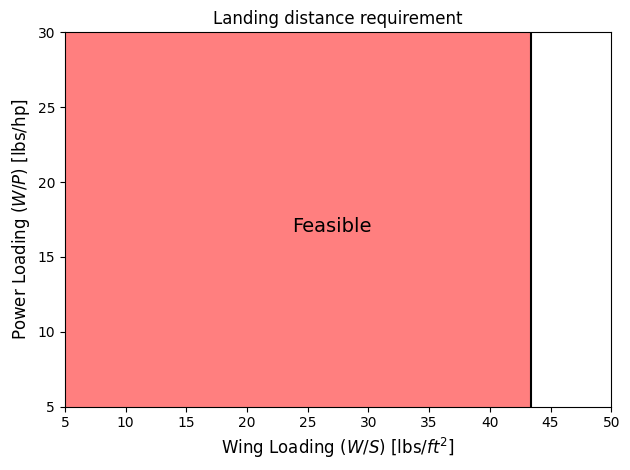

In [11]:
import numpy as np
import matplotlib.pyplot as plt

s_lgr = 1500 # ft
density_sea_level = 0.002387 # slugs/cu. ft
CL_max_L = 2.2 # assumed
wl_by_w_to = 0.975

# stall speed
v_sL = (s_lgr/0.265)**0.5 # in knots
v_sL = v_sL * 1.68781 # in ft/s

# W/S amd W/P values
num_pts = 500
wing_loading = np.linspace(5, 50, num_pts) # lb/ft^2
power_loading = np.linspace(5, 30, num_pts) # lb/hp
X, Y = np.meshgrid(wing_loading, power_loading)

landing_req =  wl_by_w_to * X * 2 / density_sea_level / CL_max_L - v_sL**2

# Plotting
fs = 12 # fontsize

fig, ax = plt.subplots()
ax.contour(X, Y, landing_req, colors="k", levels=[0])
ax.contourf(wing_loading, power_loading, landing_req<=0, colors="r", levels=[0.5,1], alpha=0.5)
ax.annotate("Feasible", (27,17), fontsize=14, va="center", ha="center")
ax.set_xlabel("Wing Loading ($W/S$) [lbs/$ft^2$]", fontsize=fs)
ax.set_ylabel("Power Loading ($W/P$) [lbs/hp]", fontsize=fs)
ax.set_title("Landing distance requirement")
ax.tick_params(axis='both', labelsize=fs-2)
plt.tight_layout()

So, any point within this red feasbile region will be able to satisfy the landing requirement.